In [16]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Copy of advp.hg38.tsv",sep='\t')
print(df.head())

  #dbSNP_hg38_chr  dbSNP_hg38_position      Top SNP   P-value LocusName  \
0            chr1              6434683   rs12074379   0.00726      ESPN   
1            chr1              6434683   rs12074379  8.51E-40        NR   
2            chr1              8708071  rs112053331    0.0009      RERE   
3            chr1              8708071  rs112053331   0.08392       NaN   
4            chr1             11487007    rs2379135    0.0156    PTCHD2   

  RA 1(Reported Allele 1) nonref_allele nonref_effect  OR_nonref  \
0                       T             T            NR        NaN   
1                       T             T            NR        NaN   
2                      NR            NR            NR        NaN   
3                      NR            NR            NR        NaN   
4                      NR            NR            NR        NaN   

  nearest_gene_symb  Study type      Study Design  Pubmed PMID Population_map  \
0              ESPN   SNP-based      Disease risk     30636

In [17]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
# This returns the count of missing values for every column
print(df.isna().sum())

#dbSNP_hg38_chr               0
dbSNP_hg38_position           0
Top SNP                       0
P-value                       8
LocusName                   102
RA 1(Reported Allele 1)     124
nonref_allele               124
nonref_effect               122
OR_nonref                  2956
nearest_gene_symb            10
Study type                    0
Study Design                  0
Pubmed PMID                   0
Population_map                0
Cohort_simple3                0
Sample size                   0
Analysis group               24
Phenotype                     0
Phenotype-derived             0
most_severe_consequence      14
dtype: int64


<Axes: >

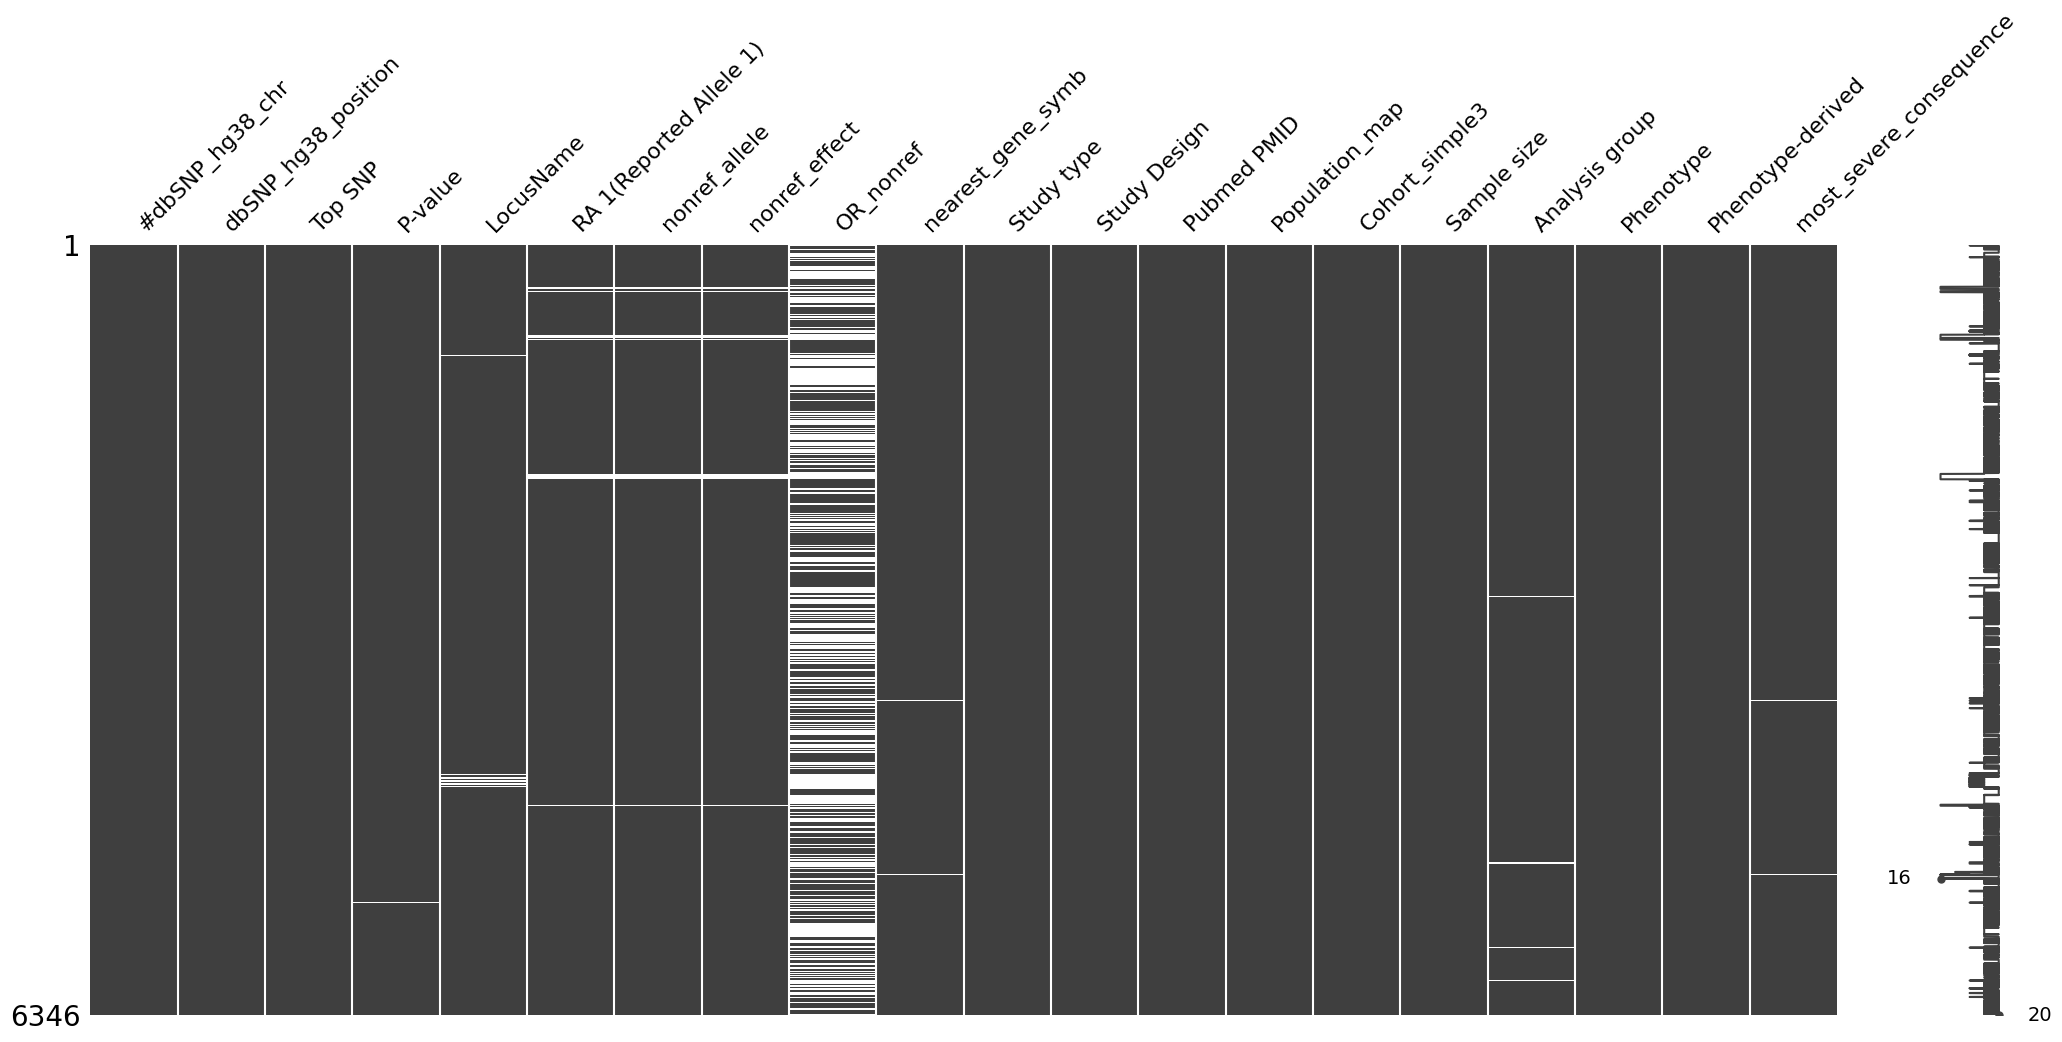

In [18]:
import missingno as msno
msno.matrix(df)

In [19]:
df = df.drop(columns=['Study Design','Sample size','Cohort_simple3','Study type'])

In [20]:
print(df.head())

  #dbSNP_hg38_chr  dbSNP_hg38_position      Top SNP   P-value LocusName  \
0            chr1              6434683   rs12074379   0.00726      ESPN   
1            chr1              6434683   rs12074379  8.51E-40        NR   
2            chr1              8708071  rs112053331    0.0009      RERE   
3            chr1              8708071  rs112053331   0.08392       NaN   
4            chr1             11487007    rs2379135    0.0156    PTCHD2   

  RA 1(Reported Allele 1) nonref_allele nonref_effect  OR_nonref  \
0                       T             T            NR        NaN   
1                       T             T            NR        NaN   
2                      NR            NR            NR        NaN   
3                      NR            NR            NR        NaN   
4                      NR            NR            NR        NaN   

  nearest_gene_symb  Pubmed PMID Population_map         Analysis group  \
0              ESPN     30636644      Caucasian  Plan 3 (only fema

In [21]:
df = df.drop(columns=['Analysis group'])

In [22]:
df['OR_nonref'] = df['OR_nonref'].fillna(1.0) #shows nuetral no risk

In [23]:
df["most_severe_consequence"].unique()


array(['intron_variant', 'missense_variant', 'intergenic_region',
       'upstream_gene_variant', '3_prime_UTR_variant',
       'downstream_gene_variant',
       '5_prime_UTR_premature_start_codon_gain_variant',
       'splice_region_variant&intron_variant', 'synonymous_variant',
       'missense_variant&splice_region_variant',
       'non_coding_transcript_exon_variant', '5_prime_UTR_variant',
       'stop_retained_variant', nan, 'stop_lost', 'splice_region_variant',
       'splice_region_variant&synonymous_variant'], dtype=object)

In [24]:
df = df.dropna(subset=["P-value"])

<Axes: >

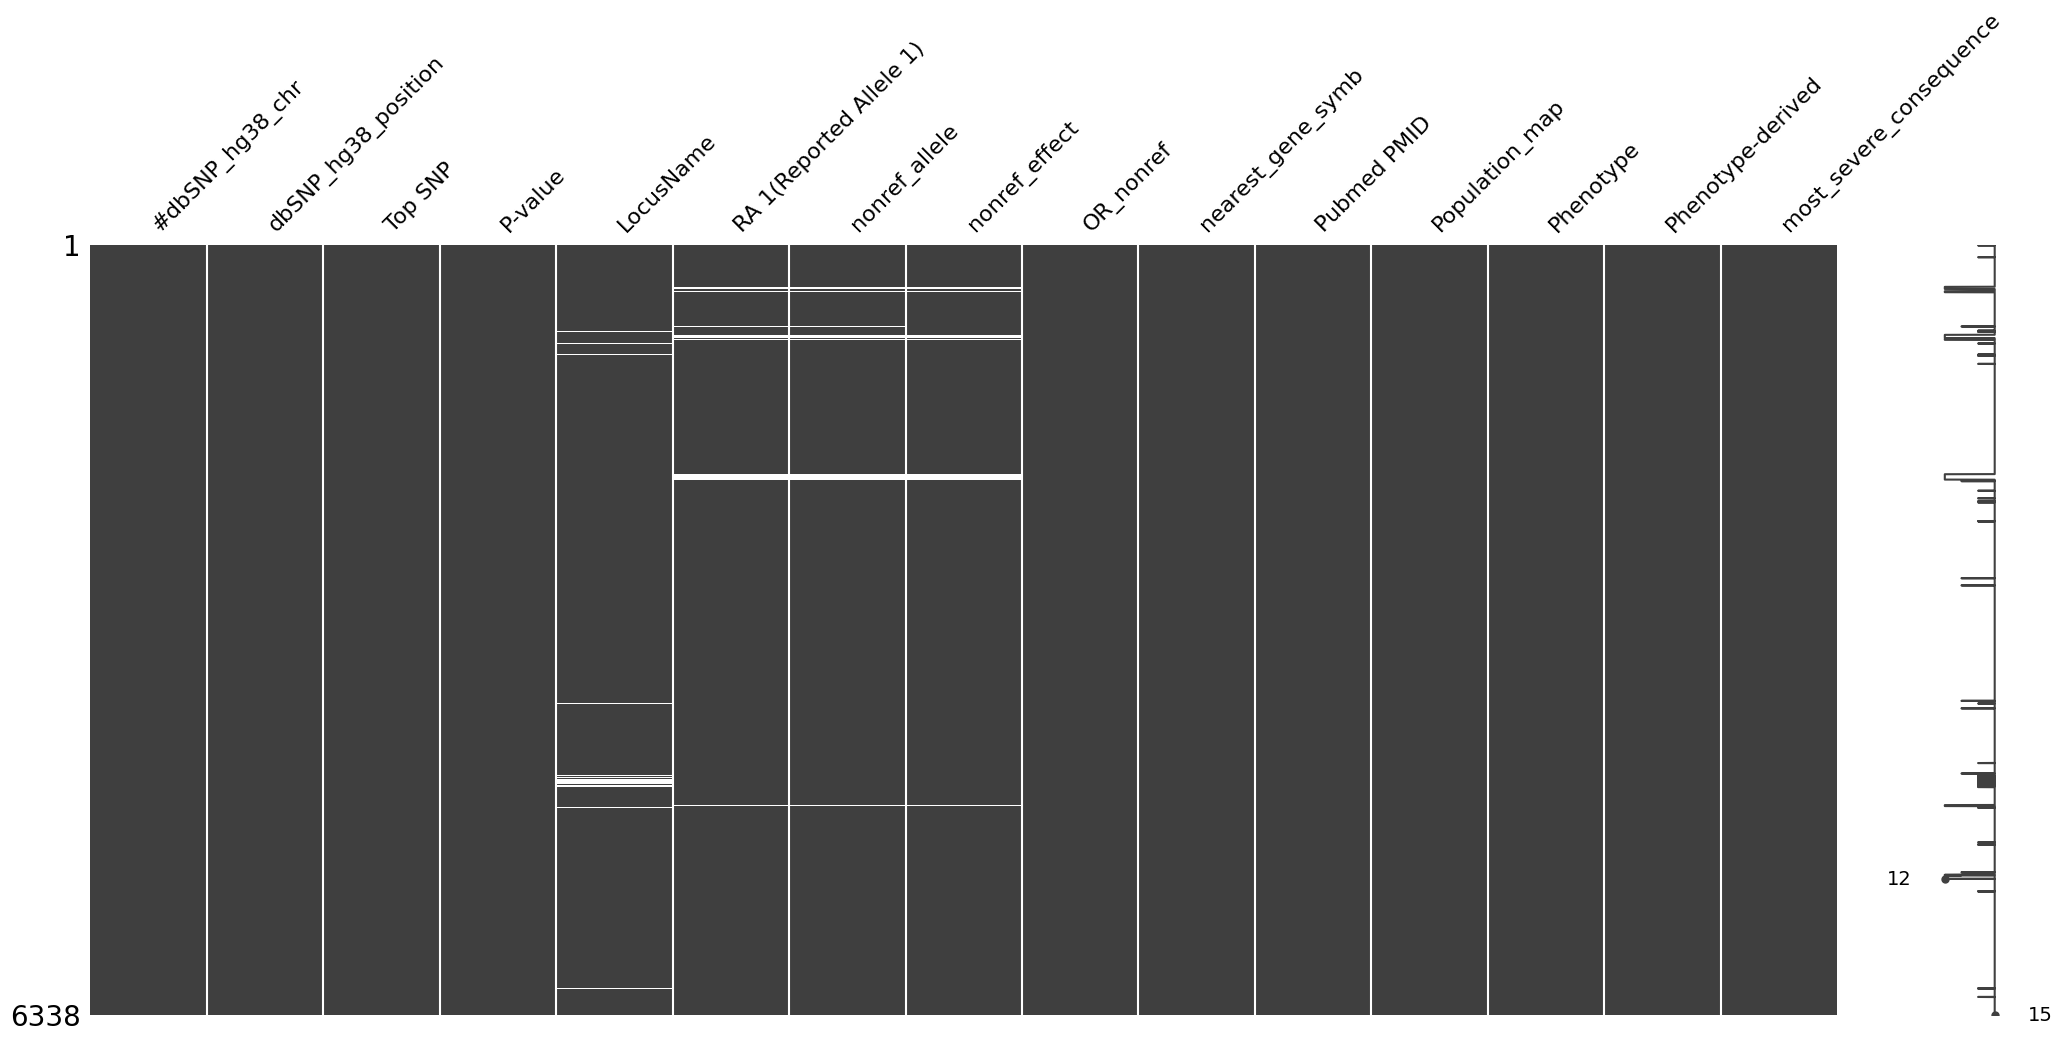

In [25]:
import missingno as msno
msno.matrix(df)

In [26]:
df = df.dropna(subset=["Top SNP", "OR_nonref"])

In [27]:
# Replaces 0 with a tiny epsilon value before the log
import numpy as np
epsilon = 1e-8
df["beta"] = np.log(df["OR_nonref"] + epsilon)


In [28]:
df.head()

,#dbSNP_hg38_chr,dbSNP_hg38_position,Top SNP,P-value,LocusName,RA 1(Reported Allele 1),nonref_allele,nonref_effect,OR_nonref,nearest_gene_symb,Pubmed PMID,Population_map,Phenotype,Phenotype-derived,most_severe_consequence,beta
0,chr1,6434683,rs12074379,0.00726,ESPN,T,T,NR,1.0,ESPN,30636644,Caucasian,AD,AD,intron_variant,1.000000e-08
1,chr1,6434683,rs12074379,8.51E-40,NR,T,T,NR,1.0,ESPN,30636644,Caucasian,ESPN (ILMN_1806710) expression,Expression,intron_variant,1.000000e-08
2,chr1,8708071,rs112053331,0.0009,RERE,NR,NR,NR,1.0,RERE,30010129,Caucasian,AD,AD,intron_variant,1.000000e-08
3,chr1,8708071,rs112053331,0.08392,NaN,NR,NR,NR,1.0,RERE,30010129,Caucasian,AD,AD,intron_variant,1.000000e-08
4,chr1,11487007,rs2379135,0.0156,PTCHD2,NR,NR,NR,1.0,DISP3,22245343,Caucasian,MRI,Imaging,intron_variant,1.000000e-08


In [29]:
df["LocusName"].unique()

array(['ESPN', 'NR', 'RERE', nan, 'PTCHD2', 'MTHFR', 'PRDM2', 'CLCNKA',
       'PADI4', 'ALDH4A1', 'RBBP4', 'TRIT1', 'KIAA0494', 'SLC5A9',
       'GLIS1', 'LDLRAD1', 'TMEM59', 'TCEANC2', 'SSBP3', 'USP24', 'DAB1',
       'PDE4B', 'NEGR1', 'CUGBP2', 'TTLL7', 'GBP2', 'ZNF326', 'MTF2',
       'GNAI3', 'CSF1', 'MAGI3', 'HIPK1', 'OTUD7B', 'OAZ3', 'LOC343052',
       'GATAD2B', 'DENND4B', 'SLC39A1', 'IL6R', 'CHRNB2', 'LMNA', 'CD5L',
       'AIM2', 'ADAMTS4', 'LOC400794', 'DPT, XCL1', 'FM03', 'FM06P',
       'C1orf49, RALGPS2', 'STX6', 'MR1', 'IER5', 'RGSL2',
       'CDC73, EEF1AL12', 'LOC102723336', 'CFH', 'CFHR1', 'CHI3L1',
       'ATP2B4', 'IL19', 'C4BPA', 'CR1', 'CR1L', 'CR2', 'CR1,CR2',
       'ZCWPW1', 'LOC643330, PROX1', 'AK092251', 'PROX1', 'AGT', 'DISC1',
       'Q0VG70_HUMAN', 'Q0VG70', 'DIP2C', 'LOC338591', 'CUGBP2, PITRM1',
       'CR595071', 'ECHDC3, LOC439951', 'ECHDC3', 'ECHDC3, USP6NL',
       'CCDC3', 'FRMD4A', 'PTER', 'CUBN', 'ARL5B', 'PLXDC2', 'ARMC3',
       'MPP7', 'BMS1',

In [30]:
df = df.dropna(subset=["Top SNP", "OR_nonref"])


<Axes: >

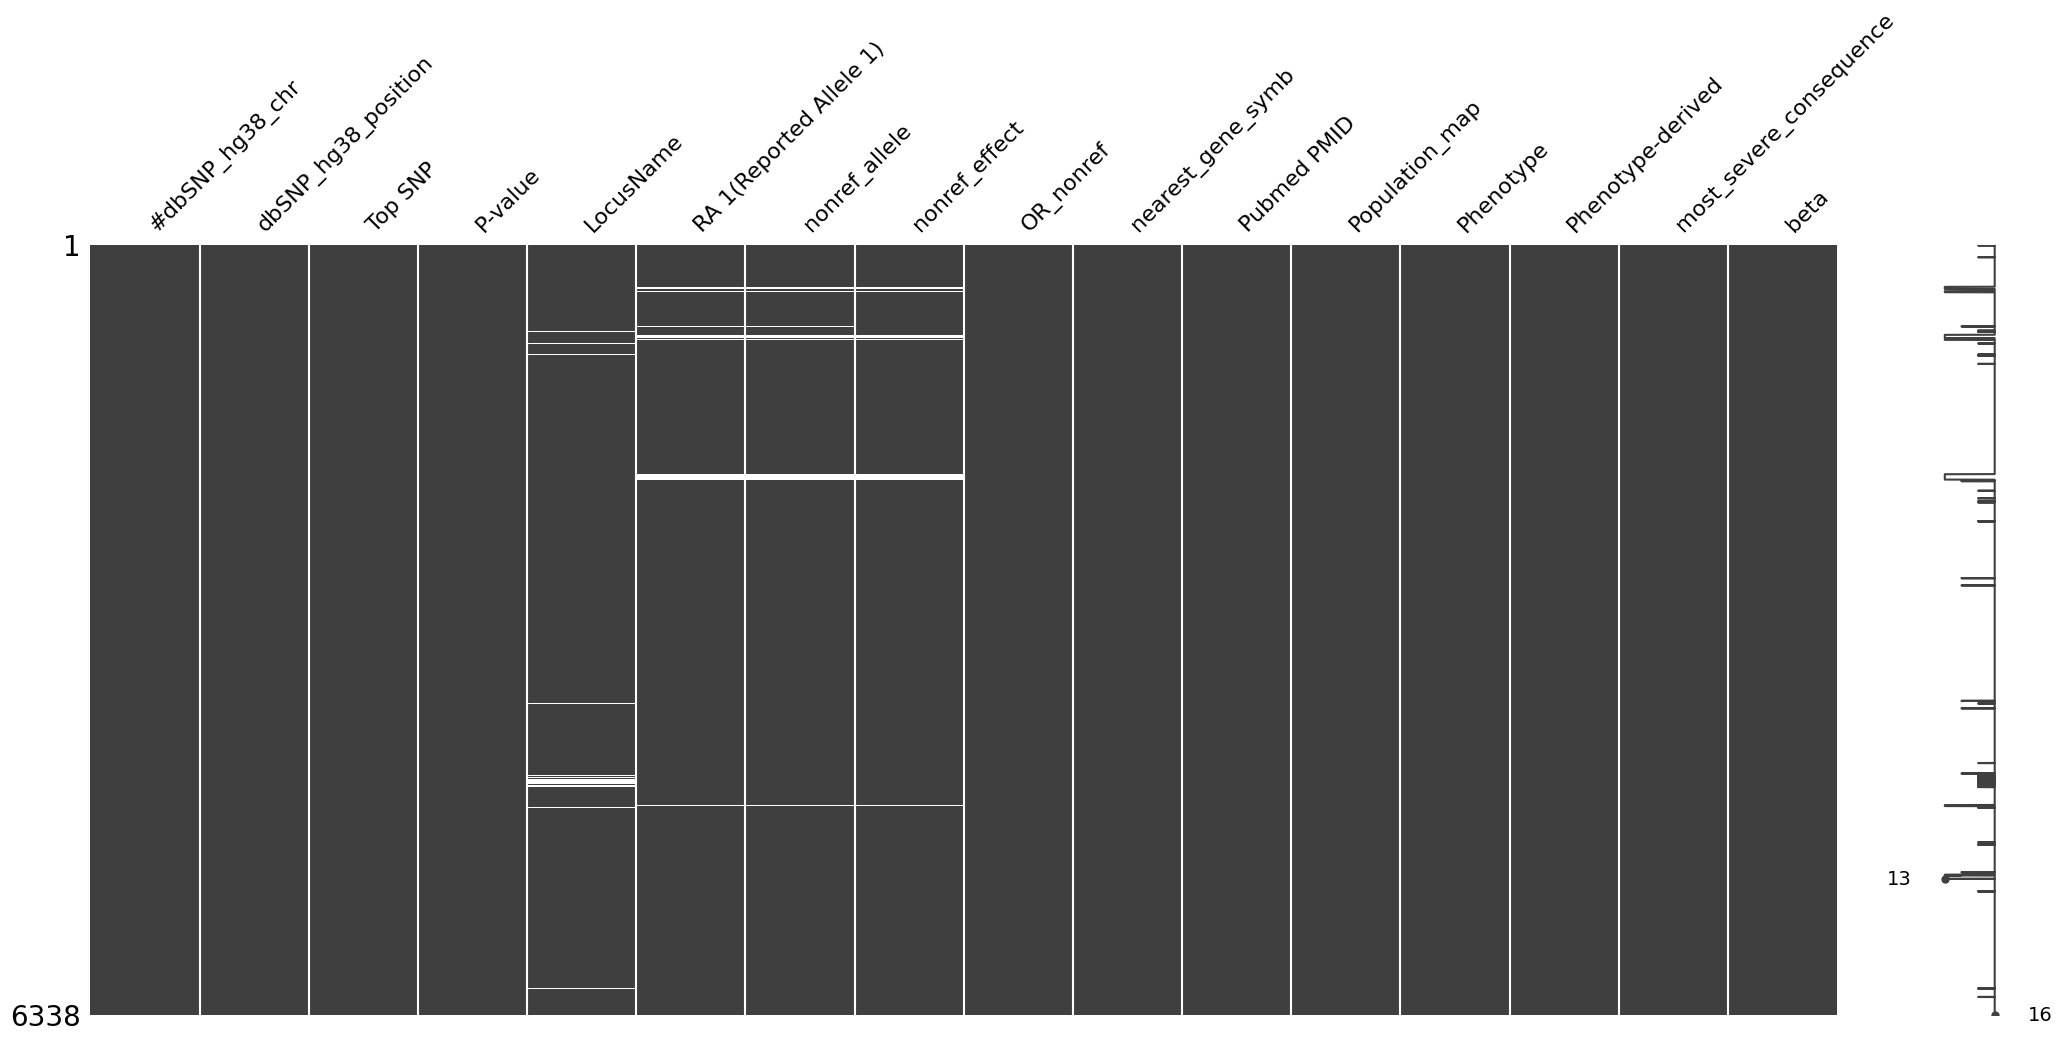

In [31]:

import missingno as msno
msno.matrix(df)


In [32]:
df = df.dropna()

In [33]:
df.head()

,#dbSNP_hg38_chr,dbSNP_hg38_position,Top SNP,P-value,LocusName,RA 1(Reported Allele 1),nonref_allele,nonref_effect,OR_nonref,nearest_gene_symb,Pubmed PMID,Population_map,Phenotype,Phenotype-derived,most_severe_consequence,beta
0,chr1,6434683,rs12074379,0.00726,ESPN,T,T,NR,1.00,ESPN,30636644,Caucasian,AD,AD,intron_variant,1.000000e-08
1,chr1,6434683,rs12074379,8.51E-40,NR,T,T,NR,1.00,ESPN,30636644,Caucasian,ESPN (ILMN_1806710) expression,Expression,intron_variant,1.000000e-08
2,chr1,8708071,rs112053331,0.0009,RERE,NR,NR,NR,1.00,RERE,30010129,Caucasian,AD,AD,intron_variant,1.000000e-08
4,chr1,11487007,rs2379135,0.0156,PTCHD2,NR,NR,NR,1.00,DISP3,22245343,Caucasian,MRI,Imaging,intron_variant,1.000000e-08
5,chr1,11796321,rs1801133,0.832,MTHFR,A,A,0.98,0.98,MTHFR,20534741,Caucasian,AD,AD,missense_variant,-2.020270e-02


In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# --- 1. PREPARE DATA ---
# Ensure P-value is numeric and transform it to -log10
# (This makes tiny numbers like 1e-40 much easier for the ML model to "see")
df['P-value'] = pd.to_numeric(df['P-value'], errors='coerce')
df['log_p'] = -np.log10(df['P-value'] + 1e-100)
df['beta'] = pd.to_numeric(df['beta'], errors='coerce')

# Define Target
df['target'] = (df['Phenotype'] == 'AD').astype(int)

# --- 2. DEFINE THE PREPROCESSOR ---
# We treat numerical and categorical data differently here
numeric_features = ['beta', 'log_p'] # P-value stays as a number
categorical_features = ['most_severe_consequence', 'nearest_gene_symb']

preprocessor = ColumnTransformer(
    transformers=[
        # Scale numbers so beta and log_p are on the same range
        ('num', StandardScaler(), numeric_features),
        # Only One-Hot Encode the text columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [36]:
# --- 3. CREATE THE ML PIPELINE ---
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


df['P-value'] = pd.to_numeric(df['P-value'], errors='coerce')
df['beta'] = pd.to_numeric(df['beta'], errors='coerce')

# replace 0 with the smallest float
df['P-value'] = df['P-value'].replace(0, np.finfo(float).tiny)

# logTransformation
df['log_p'] = -np.log10(df['P-value'])

# Drop rows with infinityand nan
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['log_p', 'beta', 'most_severe_consequence', 'nearest_gene_symb'])

# Define Target: 1 if Alzheimer's (AD)
# (Ensure your column name matches exactly 'Phenotype')
df['target'] = (df['Phenotype'].str.contains('AD', na=False)).astype(int)

#  ENCODE
# Select features
features = ['beta', 'log_p', 'most_severe_consequence', 'nearest_gene_symb']
X = df[features]
y = df['target']

# Define how to handle different column types
numeric_features = ['beta', 'log_p']
categorical_features = ['most_severe_consequence', 'nearest_gene_symb']

#One-Hot Encodes text
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Preprocess then Train
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf_pipeline.fit(X_train, y_train)

#  DECODE
def decode_risk(prob):
    """Translates a decimal probability into a human-readable percentage and risk level."""
    pct = prob * 100
    if pct > 70:
        level = "High Risk"
    elif pct > 35:
        level = "Moderate Risk"
    else:
        level = "Low Risk"
    return f"{pct:.2f}% | {level}"

# Get the probability of having AD (column 1)
test_probabilities = clf_pipeline.predict_proba(X_test)[:, 1]

print("\n--- Model Prediction Results ---")
for i in range(min(5, len(X_test))):
    result = decode_risk(test_probabilities[i])
    print(f"Sample {i+1}: {result}")

# Check model performance
auc = roc_auc_score(y_test, test_probabilities)
print(f"\nModel Confidence Score (AUC): {auc:.4f}")


--- Model Prediction Results ---
Sample 1: 73.00% | High Risk
Sample 2: 66.00% | Moderate Risk
Sample 3: 73.00% | High Risk
Sample 4: 3.00% | Low Risk
Sample 5: 18.00% | Low Risk

Model Confidence Score (AUC): 0.9244
